In [2]:
"""This code
allows me to write queries
inline"""

#helllo everyone
hello

import yfinance as yf

# Import Pandas as PD

In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from numpy.linalg import svd

Matplotlib is building the font cache; this may take a moment.


In [10]:
tickers = ['AMT','PLD','WELL','EQIX','DLR',
           'O','SPG','PSA','CCI','CBRE',
           'CSGP','VICI','EXR','IRM','AVB',
           'VTR','SBAC','EQR','WY','INVH',
           'ESS','MAA','KIM','UDR','CPT',
           'DOC','REG','ARE','HST','BXP']

In [11]:
df = yf.download(
    tickers,
    period="6mo",
    auto_adjust=True,
    multi_level_index=False
)

[*********************100%***********************]  30 of 30 completed


In [12]:
prices = df['Close'].dropna(axis=1, how='all')

In [13]:
print("Price data shape:", prices.shape)  # Expect ~120 rows × 30 columns
prices.head()

Price data shape: (123, 30)


Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-30,179.026428,95.147850,216.303040,72.130211,130.270004,87.364021,113.784645,71.820000,173.539200,19.339945,...,103.187462,289.958221,72.002502,201.309265,166.586380,42.179638,28.238607,57.654697,123.790855,27.472834
2024-12-31,180.492737,96.203079,218.167633,73.283279,131.289993,88.317657,115.043747,71.589996,174.632309,19.620657,...,103.776543,293.516418,72.512527,201.784515,167.892792,42.512608,28.433289,58.478901,124.890816,27.728945
2025-01-02,178.150589,96.153763,215.291412,72.632828,129.899994,86.858017,113.695419,70.830002,174.307343,19.514177,...,102.362755,290.712982,70.825508,198.418152,169.179688,41.650799,28.219137,57.555393,123.592659,27.571339
2025-01-03,179.656235,97.790848,217.374191,73.825317,131.500000,87.568367,116.064903,72.250000,178.975235,19.765852,...,103.707817,294.506470,71.629791,199.804306,171.656021,42.189430,28.676640,57.902954,124.682716,27.935806
2025-01-06,177.392822,96.380592,211.036545,70.947594,132.389999,86.157394,112.485893,71.209999,176.867783,19.378664,...,104.719078,289.977814,69.717178,196.962677,170.037628,40.632301,28.773981,56.502796,122.928719,28.073711


We calculate daily returns as  
\( r_t = \frac{P_t - P_{t-1}}{P_{t-1}} \).

**Purpose:** Normalizes across stocks, ensures stationarity—essential prerequisites for covariance, PCA, and SVD.


In [14]:
# Compute daily percentage returns
returns = prices.pct_change().dropna()
print("Returns shape:", returns.shape)
returns.head()


Returns shape: (122, 30)


Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-31,0.008190,0.011090,0.008620,0.015986,0.007830,0.010916,0.011066,-0.003202,0.006299,0.014515,...,0.005709,0.012271,0.007083,0.002361,0.007842,0.007894,0.006894,0.014296,0.008886,0.009322
2025-01-02,-0.012976,-0.000513,-0.013184,-0.008876,-0.010587,-0.016527,-0.011720,-0.010616,-0.001861,-0.005427,...,-0.013623,-0.009551,-0.023265,-0.016683,0.007665,-0.020272,-0.007532,-0.015792,-0.010394,-0.005684
2025-01-03,0.008452,0.017026,0.009674,0.016418,0.012317,0.008178,0.020841,0.020048,0.026780,0.012897,...,0.013140,0.013049,0.011356,0.006986,0.014637,0.012932,0.016212,0.006039,0.008820,0.013219
2025-01-06,-0.012599,-0.014421,-0.029155,-0.038980,0.006768,-0.016113,-0.030836,-0.014394,-0.011775,-0.019589,...,0.009751,-0.015377,-0.026701,-0.014222,-0.009428,-0.036908,0.003394,-0.024181,-0.014068,0.004937
2025-01-07,-0.017142,-0.003786,-0.007284,-0.023059,-0.028325,-0.012198,-0.027763,-0.011937,0.001559,-0.005494,...,-0.000750,0.008011,-0.012943,-0.015282,-0.001376,-0.010123,-0.010487,0.002988,0.001532,-0.017193


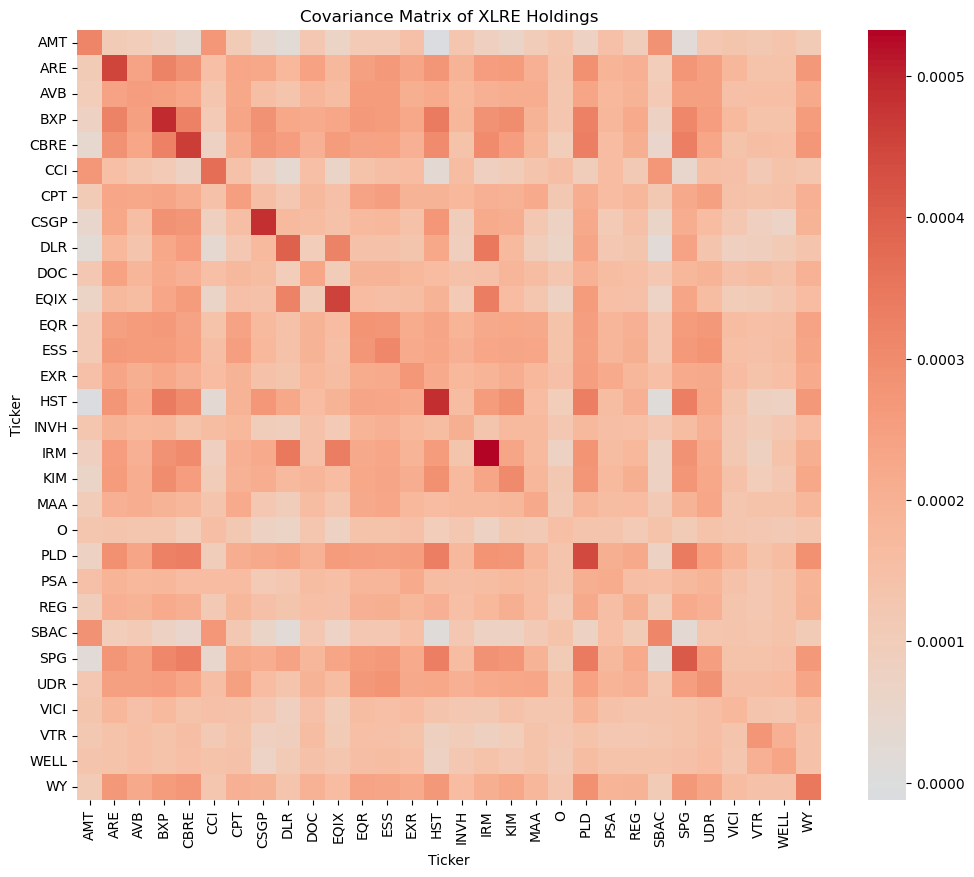

In [15]:
cov_matrix = returns.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap="coolwarm", center=0)
plt.title("Covariance Matrix of XLRE Holdings")
plt.show()

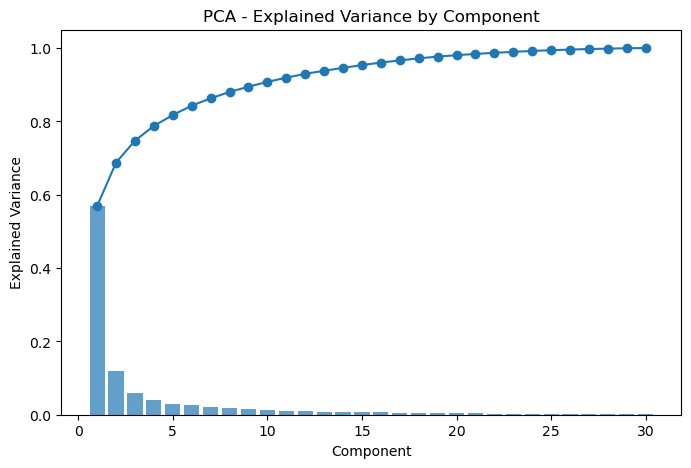

Top 3 eigenvalues: [0.00560085 0.0011668  0.00058775]
First PC eigenvector loadings:
Ticker
BXP     0.240692
PLD     0.236745
CBRE    0.228702
SPG     0.226940
ARE     0.226750
HST     0.216711
IRM     0.214506
ESS     0.210168
EQR     0.206088
WY      0.205536
dtype: float64


In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(returns)

explained = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7)
plt.plot(range(1,len(explained)+1), explained.cumsum(), marker='o')
plt.xlabel("Component")
plt.ylabel("Explained Variance")
plt.title("PCA - Explained Variance by Component")
plt.show()

print("Top 3 eigenvalues:", pca.explained_variance_[:3])
print("First PC eigenvector loadings:")
print(pd.Series(pca.components_[0], index=returns.columns).sort_values(ascending=False).head(10))


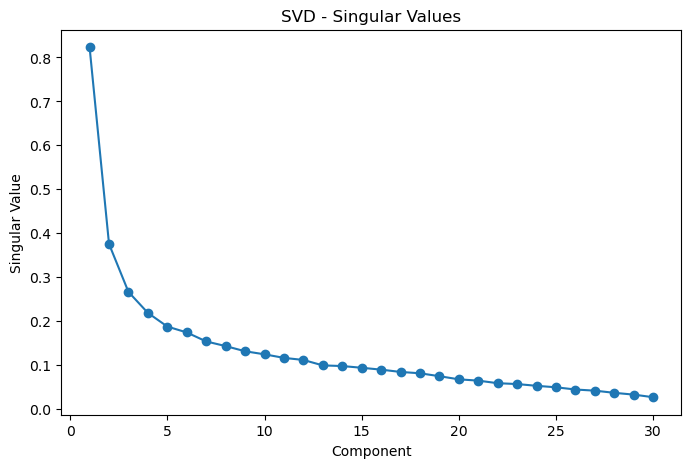

Top 3 singular values: [0.82322708 0.37574368 0.26667878]
First right singular vector loadings:
Ticker
AMT    -0.096472
SBAC   -0.102303
O      -0.113887
CCI    -0.121352
VTR    -0.127605
WELL   -0.134061
VICI   -0.138006
INVH   -0.150302
PSA    -0.160372
DLR    -0.160394
dtype: float64


In [17]:
from numpy.linalg import svd

X = returns - returns.mean()
U, S, VT = svd(X.values, full_matrices=False)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(S)+1), S, marker='o')
plt.xlabel("Component")
plt.ylabel("Singular Value")
plt.title("SVD - Singular Values")
plt.show()

print("Top 3 singular values:", S[:3])
print("First right singular vector loadings:")
print(pd.Series(VT[0], index=returns.columns).sort_values(ascending=False).head(10))
